# Problem 1: Bayes Classifier

Bayes classifiers fall under the class of **generative classifiers**. Generative classifiers attempt to learn the generation process of a dataset, usually by making some assumptions about the process that generates the data. Then such classifiers use the learned model to make a prediction or classify the unseen data. A simple example is a Naïve Bayes Classifier.

### Naïve Bayes classifier
Consider a dataset $\left\{X^{(i)}, Y^{(i)}\right\}_{i=1}^{m}$. Each $X^{(i)}$ is an $n-$dimensional vector of input features. Let $Y^{(i)} \in \{0,1\}$ denote the class to which $X^{(i)}$ belongs (this can be easily extended to multi-class problems as well). A good classifier has to accurately predict the probability that any given input $X$ falls in class $1$ which is $ P(Y=1 | X)$. 

Recall Bayes theorem,

\begin{align}
P(Y|X) &= \frac{P(X|Y)P(Y)}{P(X)} \\
       &= \frac{P(X_1, X_2, \dots, X_n | Y)P(Y)}{P(X_1, X_2, \dots, X_n)}\\
\end{align}

**We use the assumption that features are independent of each other. That is one particular feature does not affect any other feature. Of course these assumptions of independence are rarely true, which is why the model is referred as the "Naïve Bayes" model. However, in practice, Naïve Bayes models have performed surprisingly well even on complex tasks, where it is clear that the strong independence assumptions are false.**

The independence assumption reduces the conditional probability expression to
\begin{align}
P(Y|X) &= \frac{P(X_1 | Y)P(X_2 | Y) \dots P(X_n | Y)P(Y)}{P(X_1)P(X_2)\dots P(X_n)}\\
\end{align}

The terms $P(X_i|Y)$ and $P(X_i)$ can be easily estimated/learned from the dataset. Hence, the value of $P(Y|X)$ can be found for each value of $Y$. Finally, the class to which $X$ belongs is estimated as $arg\max_{Y}P(Y|X)$. Moreover since $X$ is independent of $Y$, it is only required to find $arg\max_{Y}P(X|Y)P(Y).$ For better understanding with an example refer [this](https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c) article.


### Problem statement and Dataset
In this problem, you would implement, train and test a Naïve Bayes model to learn to classify sentiment (positive/negative) of a given text. The training data is in `all_sentiment_shuffled.txt` file.  You can use the function given below to read the dataset


In [0]:
def read_corpus(corpus_file):
    """ This function reads the file in the location specified by string 
    `corpus_file` and returns a list of tuples (list of words in text, label)
    """
    out = []
    with open(corpus_file) as f:
        for line in f:
            tokens = line.strip().split()
            out.append((tokens[3:], tokens[1]))
    return out

In [0]:
corpus = read_corpus('./all_sentiment_shuffled.txt')
print("Example:\n", " Text: ", corpus[0][0], "\n  Label: ", corpus[0][1])
print("Total number of documents =", len(corpus))

Example:
  Text:  ['i', 'bought', 'this', 'album', 'because', 'i', 'loved', 'the', 'title', 'song', '.', 'it', "'s", 'such', 'a', 'great', 'song', ',', 'how', 'bad', 'can', 'the', 'rest', 'of', 'the', 'album', 'be', ',', 'right', '?', 'well', ',', 'the', 'rest', 'of', 'the', 'songs', 'are', 'just', 'filler', 'and', 'are', "n't", 'worth', 'the', 'money', 'i', 'paid', 'for', 'this', '.', 'it', "'s", 'either', 'shameless', 'bubblegum', 'or', 'oversentimentalized', 'depressing', 'tripe', '.', 'kenny', 'chesney', 'is', 'a', 'popular', 'artist', 'and', 'as', 'a', 'result', 'he', 'is', 'in', 'the', 'cookie', 'cutter', 'category', 'of', 'the', 'nashville', 'music', 'scene', '.', 'he', "'s", 'gotta', 'pump', 'out', 'the', 'albums', 'so', 'the', 'record', 'company', 'can', 'keep', 'lining', 'their', 'pockets', 'while', 'the', 'suckers', 'out', 'there', 'keep', 'buying', 'this', 'garbage', 'to', 'perpetuate', 'more', 'garbage', 'coming', 'out', 'of', 'that', 'town', '.', 'i', "'ll", 'get', 'down'

### Preprocessing a text document
We can guess that not all the words in a document will be helpful in classification. The words such as "a", "the", "is", etc appear in all the documents randomly and can be neglected or removed. Also a same word can be written in different tenses while conveying the same mood (example "rot"/"rotten"). Hence the documents need to be preprocessed before using them for training the classifier.

 Libraries such as `gensim`, `nltk` contain functions for doing these preprocessing steps, and you are welcome to use such functions in your code. Formally, these are the preprocessings to be done to the input text to make them simpler and which can improve the performance of your model as well.
* **Tokenization**: 
    1.   Split the text into sentences and the sentences into words
    2.   Lowercase the words and remove punctuation
* Remove all **stopwords** (stopwords are commonly used word such as "the", "a", "an", "in")
* Remove all words that have fewer than 3 characters.
* **Lemmatize** the document (words in third person are changed to first person, and verbs in past and future tenses are changed into present).


In [0]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
""" Implement preprocessing functions here. Use the python modules named above 
for implementing the functions. 
"""
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from string import punctuation

# Removes all the punctuations present in the document
def remove_punctuation(doc):
    out_doc = [token for token in doc if token not in punctuation]
    return out_doc
    # pass

# Removes words like 'if', 'he', 'she', 'the', etc which never belongs to any topic
def remove_stopwords(doc):
    stop_words = set(stopwords.words('english'))
    out_doc = [token for token in doc if token not in stop_words ]
    out_doc = [token for token in out_doc if len(token)>=3]
    return out_doc
    # pass

# Maps Part-Of-Speech tag's first character to the format that lemmatize() accepts
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


# lemmatizer is a transformers which transforms the word to its singular, present-tense form
def lemmatize(doc):
    l = WordNetLemmatizer()
    out_doc = [l.lemmatize(token, get_wordnet_pos(token)) for token in doc]
    return out_doc
    # pass

def preprocess(doc):
    """ Function to preprocess a single document
    """
    assert isinstance(doc, list) # assert that input is a document and not the corpus
    processed_doc = remove_punctuation(doc)
    processed_doc = remove_stopwords(processed_doc)
    processed_doc = lemmatize(processed_doc)
    return processed_doc

### Implementation of Naïve Bayes 

You can refer the Naïve Bayes section in [this](https://web.stanford.edu/~jurafsky/slp3/slides/7_NB.pdf) slides (slide #32 has a simple pseudo code) to get a hint about implementation of Naïve Bayes for text classification. Then complete the following functions `train_nb` and `classify_nb`.

NOTE: If you multiply many small probabilities you may run into problems with numeric precision: the probability becomes zero. To handle this problem, it is recommended that you compute the logarithms of the probabilities instead of the probabilities.

In [0]:
import numpy as np

# The texts are extracted from corpus, processed, and concatenated back with the labels

processed_corpus = [np.array(preprocess(corpus[i][0])) for i in range(len(corpus))]
labels = [corpus[i][1] for i in range(len(corpus))]
processed_docs = np.array([[processed_corpus[i], labels[i]] for i in range(len(corpus))])

In [0]:
def train_nb(training_documents):
    # Return the data you need to classify new instances
    pos_docs = np.array(training_documents[training_documents[:, 1] == 'pos', :])
    neg_docs = np.array(training_documents[training_documents[:, 1] == 'neg', :])
    
    print("Acquiring probabilities from training data...")
    p_pos = len(pos_docs)/len(training_documents)
    p_neg = len(neg_docs)/len(training_documents)  # Prior probabilities evaluated
    pos_corpus = np.hstack(pos_docs[:,0].flatten())
    neg_corpus = np.hstack(neg_docs[:,0].flatten())  # The corpuses of words in positive reviews and negative reviews are made separately
    corpus_text = np.hstack(training_documents[:,0].flatten())  # Corpus of words in all reviews

    words = np.unique(corpus_text)  # Array of unique words in all reviews
    pos_words, pos_counts = np.unique(pos_corpus, return_counts = True)
    neg_words, neg_counts = np.unique(neg_corpus, return_counts = True)
    jpos = 0
    jneg = 0
    pos_counts_final, neg_counts_final = [], []
    for k in words:
        if k in pos_words:
            pos_counts_final.append(pos_counts[jpos])   # Appends the frequency of the kth word in words, in the positive reviews
            jpos+=1
        else:
            pos_counts_final.append(0)   # Appends a zero if the kth word in words is not found in pos_words
        if k in neg_words:
            neg_counts_final.append(neg_counts[jneg])  # Appends the frequency of the kth word in words, in the negative reviews
            jneg+=1
        else:
            neg_counts_final.append(0)  # Appends a zero if the kth word in words is not found in neg_words
    print("Acquired.")
    pos_counts_final = np.array(pos_counts_final)
    neg_counts_final = np.array(neg_counts_final)

    return p_pos, p_neg, words, pos_counts_final, neg_counts_final

def classify_nb(training_documents, test_docs):
    # return the guess of the classifier
    p_pos, p_neg, words, pos_counts, neg_counts = train_nb(training_documents)
    pos_dict = dict(zip(words, pos_counts))
    neg_dict = dict(zip(words, neg_counts))
    test_docs[:,0] = np.array([np.array(i) for i in test_docs[:,0]])
    test_tokens = test_docs[:,0]
    pred_labels = []
    for i in test_tokens:
        pos_probs = np.array([pos_dict.get(k,0)+1/(np.sum(pos_counts)+len(words)) for k in i])   # Uses the Multinomial Naive Bayes result given in slide 32 above, 
        neg_probs = np.array([neg_dict.get(k,0)+1/(np.sum(neg_counts)+len(words)) for k in i])   # to evaluate positive and negative probabilities of each word in the test review
        prob_pos_doc = p_pos*np.exp(np.sum(np.log(pos_probs)))   # Bayes Rule to evaluate the probabilities of the test review being positive and negative
        prob_neg_doc = p_neg*np.exp(np.sum(np.log(neg_probs)))   # log probabilites summed and exp taken, instead of directly multiplying probabilities, because of precision issues
        pred_labels.append('pos' if prob_pos_doc > prob_neg_doc else 'neg')  # MAP Rule
    return np.array(pred_labels)

### Train-test split
After reading the dataset, you must split the dataset into training ($80\%$) and test data ($20\%$). Use training data to train the Naïve Bayes classifier and use test data to check the accuracy.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(processed_docs[:,0], processed_docs[:,1], test_size = 0.2)
train_dat1 = np.concatenate((X_train[:, np.newaxis], Y_train[:, np.newaxis]), axis = 1)
test_dat1 = np.concatenate((X_test[:, np.newaxis], Y_test[:, np.newaxis]), axis = 1)
pred_labels1 = classify_nb(train_dat1, test_dat1)

true_labels1 = test_dat1[:,-1]
accuracy = np.sum(pred_labels1 == true_labels1)/len(true_labels1)
print("\nThe accuracy of the classifier = " + str(100*accuracy) + "%")

Acquiring probabilities from training data...
Acquired.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: overflow encountered in exp



The accuracy of the classifier = 70.49937054133444%


### Comparison (Bonus)
Also use `sklearn`'s Naïve Bayes classifier and compare its performance with the classifier you implemented. 

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

tfidf = TfidfVectorizer()   # The training and testing inputs to the sklearn classifier must all be of the same length, therefore a vectoriser is used to make their lengths equal
reviews = []
X_train_ = np.zeros_like(X_train)
X_test_ = np.zeros_like(X_test)
for i in range(len(X_train)):
    X_train_[i] = ' '.join(X_train[i])  # The vectoriser accepts list of sentences, not tokenised lists. We rejoin the tokens to form the sentences
for i in range(len(X_test)):
    X_test_[i] = ' '.join(X_test[i])
tfidf.fit(X_train_, Y_train)
train_dat1_vec = tfidf.transform(X_train_)   
test_dat1_vec = tfidf.transform(X_test_)   # The train and test data are vectorised
mnb = MultinomialNB()
mnb.fit(train_dat1_vec, train_dat1[:,1])
print("\nThe accuracy of the sklearn classifier = " + str(100*mnb.score(test_dat1_vec, test_dat1[:,1])) + "%")


The accuracy of the sklearn classifier = 82.4590851867394%


Make sure your code is well documented with comments explaining everything done in your algorithm. With this being said, you are free to design your code anyway you like as long as it implements a Naïve Bayes model and is easily understandable. If you digress from the given code template, explain briefly the structure of your code as well.

# Problem 2: Regularization and bias-variance trade-off


### Problem statement
In this question we will see how regularization can be used to prevent overfitting of data and then observe the bias-variance tradeoff in a practical setting.

### Dataset generation
- Generate 10 data points $f(x)=sin(2\pi x)$ where $x \hspace{0.1cm} \epsilon \hspace{0.1cm} [0, 1]$ is sampled uniformly.
- Add Gaussian noise $N(0, 0.5)$ to the generated data. By generating data in this way, we are capturing a property of many real data sets - namely, that they possess an underlying regularity $f(x)$, which we wish to learn, but that individual observations are corrupted by random noise $N(0,0.5)$.
- We will now use this set of 10 data points as the training dataset.

In [0]:
import numpy as np

x_vals = np.random.uniform(low = 0.0, high = 1.0, size = 10)
fx = np.sin(2*np.pi*x_vals)
N = np.random.normal(loc = 0.0, scale = np.sqrt(0.5), size = 10)
y = fx + N
x = x_vals[:, np.newaxis]
y = y[:, np.newaxis]

### Polynomial curve fitting 
- Fit 5 polynomial regression models with varying polynomial orders $M = \{0, 1, 3, 6, 9\}$ on the training dataset. Use the polynomial function of the form:  $y(x, \textbf{w})=\sum^{M}_{j=0}w_jx^j$ and $L2$ loss as the error function: $E(\textbf{w})= \frac{1}{2}\sum^{N}_{n=1}\{y(x_n, \textbf{w}) - t_n)\}^2$, where $t_n$ is the true output for the input $x_n$, and $N$ is the total number of training points.
- For each model: $M = \{0, 1, 3, 6, 9\}$, plot the graph of the function obtained from fitting the model onto the training dataset along with the training dataset points. 
- Report the mean squared error on the training dataset and explain its trend with increasing model complexity. Comment on overfitting and underfitting.
- For each model: $M = \{0, 1, 3, 6, 9\}$, report the coefficients $\textbf{w}^*$. Explain the trend in the coefficients with increasing model complexity. 
- The goal here is to achieve good generalization by making
accurate predictions for new data, and not the training data. Use the data generation procedure used previously to generate 100 data points but with new choices for the random noise values included in the target values. These 100 data points will now form our validation dataset.
- Evaluate each model: $M = \{0, 1, 3, 6, 9\}$ on the validation set and report the mean squared error for each model. 
- Plot the training and validation set mean squared errors for models with $M = \{0, 1, 3, 6, 9\}$ on the same graph. Explain the trend in the error values with increasing model complexity.

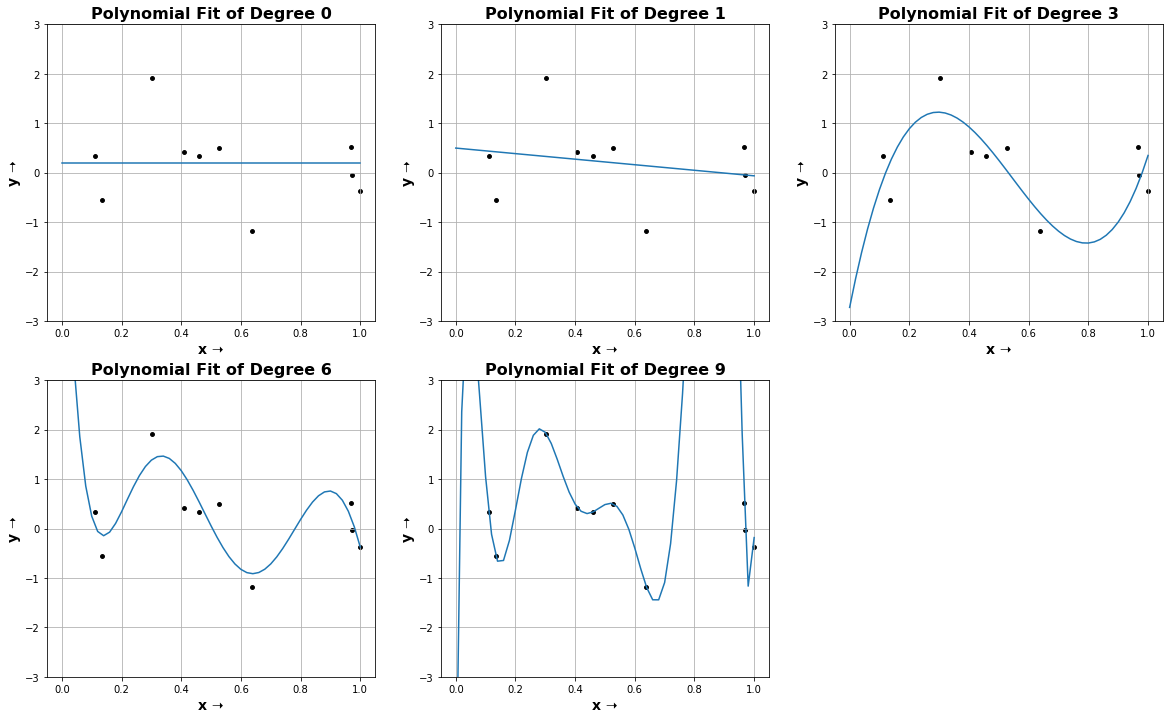

Training MSE for degree 0 = 0.6079108645556578
Coefficient vector for degree 0 = [0.1891965818309182]

Training MSE for degree 1 = 0.5758254644537093
Coefficient vector for degree 1 = [0.499124998949001, -0.5617415153014675]

Training MSE for degree 3 = 0.2928839620961498
Coefficient vector for degree 3 = [-2.724887727786952, 30.49103721605258, -70.72896198413112, 43.31220984304852]

Training MSE for degree 6 = 0.18054228816393686
Coefficient vector for degree 6 = [8.293286107210468, -163.16231096226753, 1114.9018212444305, -3320.6885696741133, 4771.595787522458, -3254.0592783499533, 842.7448203108909]

Training MSE for degree 9 = 5.846254188857463e-20
Coefficient vector for degree 9 = [-6.098972726298081, 642.3527013348588, -13056.67033983442, 114862.5829683539, -539969.5692316027, 1484368.4830563648, -2460025.608665052, 2415758.961539334, -1292148.6312848812, 289574.01495479245]



In [0]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures  # Used to generate the Polynomial Features of x, given the degree we need

trainmse, coeffs_list = [], []
plt.figure(figsize = (20,12))
c = 0
for M in [0,1,3,6,9]:
    polynomial_features= PolynomialFeatures(degree = M)
    x_poly = polynomial_features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)  # The Polymonial Regression is done
    x_axis = np.arange(0,1.02,0.02)[:, np.newaxis]
    x_poly_axis = polynomial_features.fit_transform(x_axis)
    y_poly_pred = model.predict(x_poly_axis)  # The f(x) values are calculated all along the x-axis for plotting

    c += 1
    plt.subplot(2, 3, c)
    plt.plot(x_axis, y_poly_pred, label = 'Degree '+str(M))
    plt.scatter(x, y, s=15, c='k')
    plt.ylim([-3,3])
    plt.title("Polynomial Fit of Degree " + str(M), fontsize = 16, fontweight = 'bold')
    plt.xlabel("x \u279d", fontsize = 14, fontweight = 'bold')
    plt.ylabel("y \u279d", fontsize = 14, fontweight = 'bold')
    plt.grid(True)
    y_pred = model.predict(x_poly)

    mse = mean_squared_error(y, y_pred)
    trainmse.append(mse)  
    intercept = model.intercept_.tolist()
    coeffs = intercept + model.coef_[0,1:].tolist()  # 'model.intercept_' is the bias term, 'model.coef_' contains the coefficients
    coeffs_list.append(coeffs)

plt.show()

for ind, M in enumerate([0,1,3,6,9]):
    print('Training MSE for degree ' + str(M) + ' = ' + str(trainmse[ind]))
    print('Coefficient vector for degree ' + str(M) + ' = ' + str(coeffs_list[ind]) + "\n")



<font color='blue'>**Overfitting and Underfitting Observations**


- With increasing model complexity, the MSE decreases. The more complex curves are able to fit the data points well. However, this leads to overfitting, as fitting **only** the training data too well will not generalise to the test data well.
- We can see that the 0 and 1 degree polynomials drastically underfit, as they do not have enough complexity to model the data.
- Degrees 3 and 6 do decently well.
- Polynomials of degrees 9 drastically overfit the points. Although they fit the points very well, the learnt functions are not close to a sine function, which is the function from which the points were originally generated.
</font>

<font color='blue'>**Coefficients Observations**


- The magnitude of coefficients increases with increasing model complexity. 
- As the degree of polynomial increases, the higher degree terms are used with high weights in order to better fit the training data. Higher degree terms are needed with high weights in order to manipulate the function to pass closely through the data points. The higher coefficients achieve higher degree of control and variation of this polynomial as we sweep through the x-axis.
</font>







In [0]:
# Evaluation on Validation Set

x_validation = np.random.uniform(low = 0.0, high = 1.0, size = 100)
fx = np.sin(2*np.pi*x_validation)
N = np.random.normal(loc = 0.0, scale = 0.5, size = 100)
y_validation = fx + N
x_validation = x_validation[:, np.newaxis]
y_validation = y_validation[:, np.newaxis]

validmse = []

for M in [0,1,3,6,9]:
    polynomial_features= PolynomialFeatures(degree = M)
    x_poly = polynomial_features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    xval_poly = polynomial_features.fit_transform(x_validation)
    yval_pred = model.predict(xval_poly)

    mse = mean_squared_error(y_validation, yval_pred)
    validmse.append(mse)
    print('Validation MSE for Degree ' + str(M) + " = " + str(mse) + "\n")

Validation MSE for Degree 0 = 0.8244375265359153

Validation MSE for Degree 1 = 0.6972552361671958

Validation MSE for Degree 3 = 0.5761517747375019

Validation MSE for Degree 6 = 1.5221829744294428

Validation MSE for Degree 9 = 33.83948336826703



[]

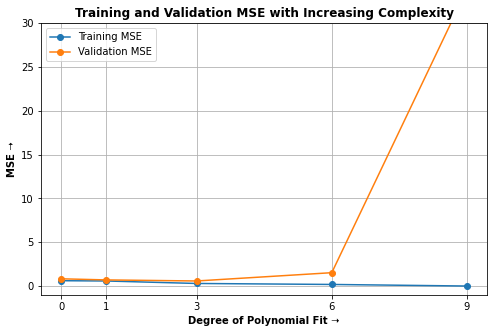

In [0]:
plt.figure(figsize = (8,5))
plt.plot([0,1,3,6,9], trainmse, '-o', label = "Training MSE")
plt.plot([0,1,3,6,9], validmse, '-o', label = "Validation MSE")
plt.title('Training and Validation MSE with Increasing Complexity', fontweight = 'bold')
plt.xlabel('Degree of Polynomial Fit \u279d', fontweight = 'bold')
plt.ylabel('MSE \u279d', fontweight = 'bold')
plt.xticks([0,1,3,6,9])
plt.legend(loc = 'upper left')
plt.ylim([-1,30])
plt.grid(True)
plt.plot()


<font color='blue'>**MSE Observations**


- With increasing model complexity, the Training MSE decreases. The more complex curves are able to fit the data points well. However, this leads to overfitting.
- With increasing model complexity, the Validation MSE decreases for a while, until the point of inflection from underfitting to overfitting is reached. As we increase the degree from 0, the polynomials tend to generalise to $sin(2\pi x)$ better and better upto a point. Beyond this tipping point, the generalisation is lost as it fits closer and closer to the training data points. Therefore, validation error shoots up, and the value is massive at degree 9.
</font>







### Regularization

We've seen the effects of increasing model complexity on the training error and the validation error above. We will now use L2 regularization to reduce overfitting.

- Fit a polynomial regression model of order $M=9$ to the same training dataset as before but now using the regularized error function given by $E^{'}(\textbf{w})= \frac{1}{2}\sum^{N}_{n=1}\{y(x_n, \textbf{w}) - t_n)\}^2 + \frac{\lambda}{2}{\|\textbf{w}\|}^2$ where $\lambda$ is the regularization hyperparameter. Use the following values for $\lambda$: $\lambda={0.01, 0.1, 1}$.
- Report the coefficients of the model fit above for $\lambda={0.01, 0.1, 1}$. Explain the trend in the coefficient values with increasing $\lambda$.
- Find the optimal value of the hyperparameter $\lambda$. 
- Compare the validation error results of the following two models : polynomial regression model of order $M=9$ without regularization and polynomial regression model of order $M=9$ with regularization hyperparameter as estimated above.

Validation MSE for lambda 0.01 = 0.4442288020227598
Coefficient vector for lambda = 0.01:
[0.08162886244887618, 2.8021986508802623, -3.4619196727283432, -3.0728220388270753, -0.88575076631487, 0.8220236283501883, 1.5902951719222744, 1.5424845862027186, 0.9079999839117758, -0.1134082274820307]

Validation MSE for lambda 0.1 = 0.5859220254204245
Coefficient vector for lambda = 0.1:
[0.442611529352422, 0.05441814609168398, -0.7223779504941945, -0.6161461838193395, -0.26551518715532, 0.034843633290757785, 0.22121332121347587, 0.30554498009567094, 0.3148597918149205, 0.2734479573578144]

Validation MSE for lambda 1 = 0.7320548141534914
Coefficient vector for lambda = 1:
[0.36238278263069856, -0.10759079868642128, -0.1621972861591109, -0.12295428851209274, -0.06699024690213691, -0.022646040238523648, 0.005860475521853101, 0.021318906414551995, 0.02747026930493497, 0.027397576387688923]



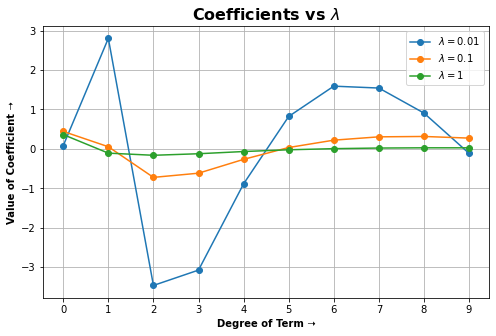

In [0]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge  # Used for Linear Regression with Regularization
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

validmse = []
plt.figure(figsize = (8,5))

for lmda in [0.01, 0.1, 1]:
    polynomial_features= PolynomialFeatures(degree = 9)
    x_poly = polynomial_features.fit_transform(x)
    model = Ridge(lmda)
    model.fit(x_poly, y)
    xval_poly = polynomial_features.fit_transform(x_validation)
    yval_pred = model.predict(xval_poly)

    mse = mean_squared_error(y_validation, yval_pred)
    validmse.append(mse)
    print('Validation MSE for lambda ' + str(lmda) + ' = ' + str(mse))
    intercept = model.intercept_.tolist()
    coeffs = intercept + model.coef_[0,1:].tolist()
    print('Coefficient vector for lambda = ' + str(lmda) + ':\n' + str(coeffs) + "\n")

    plt.plot(coeffs,  '-o', label = '$\lambda = $' +str(lmda))
plt.grid(True)
plt.xticks(range(10))
plt.xlabel('Degree of Term \u279d', fontweight = 'bold')
plt.ylabel('Value of Coefficient \u279d', fontweight = 'bold')
plt.title('Coefficients vs $\lambda$', fontweight = 'bold', fontsize = 16)
plt.legend(loc='upper right')
plt.show()


<font color='blue'>**Regularization Observations**

- As $\lambda$ increases, the magnitude of the coefficients shows a decreasing trend. This is because regularization puts a penalty on the magnitude of the coefficients.
- $\lambda = 0.01$ seems to have the smallest validation error, and is the optimal value of $\lambda$.
- Validation error with $M = 9$ without regularization = 33.839
- Validation error with $M = 9$ with regularization ($\lambda = 0.01$) = 0.444
- The drop in error is huge! Since regularization puts a penalty on the magnitude of the coefficients, the earlier minute control over the oscillations of the polynomial is lost, which increases training MSE. However, it leads to a smoother curve overall, which generalises very well to $sin(2\pi x)$.
</font>







### Bias-variance trade-off:

In class you have seen that the expected prediction error for any model can be decomposed as the sum of $bias^2, variance$ and $irreducible\,noise$. We will now observe the bias-variance trade-off for a polynomial regression model of order $M=9$ with varying regularization hyperparameter.
- Generate $50$ datasets, each containing $10$ points, independently, from the curve $f(x)=sin(2\pi x)$. Add gaussian noise $N(0,0.5)$ to each data point.
- Fit a polynomial regression model of order $M=9$ to each training dataset by minimizing the regularized error function $E^{'}(\textbf{w})$ with $\lambda=1$.
- Plot the following:
  - function obtained by training the model on each of the 50 datasets in the same figure.
  - The corresponding average of the 50 fits and the sinusoidal function from which the datasets were generated in the same figure.
- Repeat this exercise for two more $\lambda$ values: $\lambda$ = 0.1, 10.
- Based on the plots obtained, explain the trend in the bias and variance values with increasing model complexity.
- Bonus (optional and will not be graded) : 
  - Plot the $bias^2$, $variance$  and $bias^2 + variance$ against $\lambda$.
  - Also plot the average test error on a test data size of 1000 points (generated in a similiar way as the 50 training datasets, but independently) against $\lambda$ on the same figure.
  - For your reference: 
$$
Bias^2= (E_{D}[\hat f(x)] - f(x))^2
\\
Variance = E_{D}[(\hat f(x) - E_{D}[\hat f(x)])^2]
$$
Here $\hat f$ is the trained model and $D$ is the set of all datasets. Use the $50$ training datasets to compute the empirical estimations.

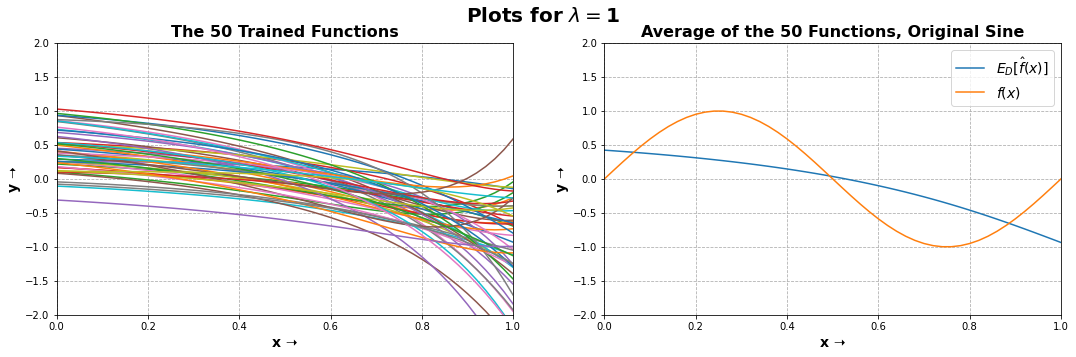

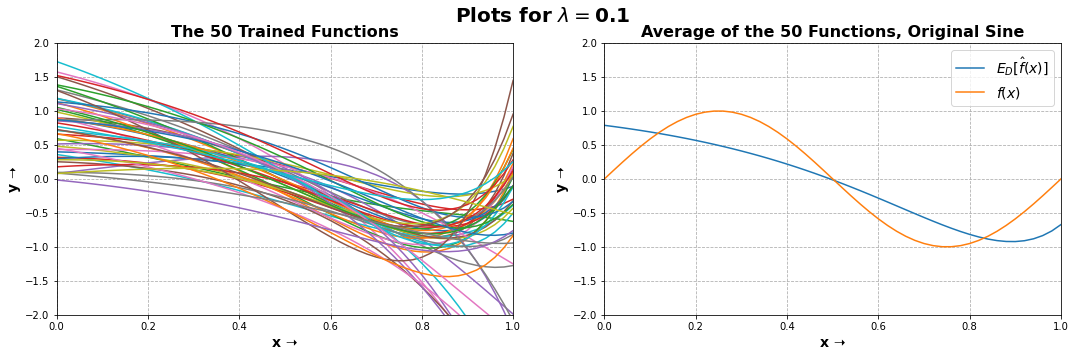

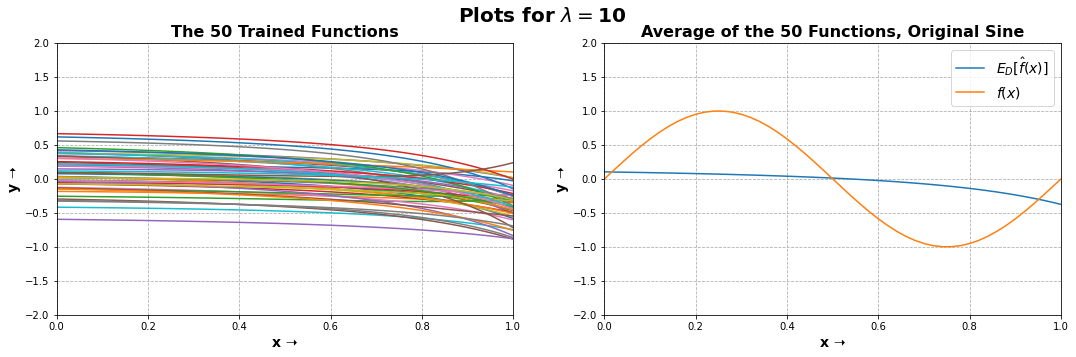

In [0]:
import numpy as np
x = np.random.uniform(low = 0.0, high = 1.0, size = (10, 50))
fx = np.sin(2*np.pi*x)
N = np.random.normal(loc = 0.0, scale = 0.5, size = (10, 50))
y = fx + N
x_axis = np.arange(0,1.02,0.02)[:, np.newaxis]

for lmda in [1, 0.1, 10]:  # Iterating through required values of lambda
    plt.figure(figsize=(18,5))
    plt.subplot(1,2,1)
    avg_pred = 0
    for i in range(50):  # The 50 runs on the different training datasets
        polynomial_features= PolynomialFeatures(degree = 9)
        x_poly = polynomial_features.fit_transform(np.expand_dims(x[:, i], axis = 1))
        model = Ridge(lmda)
        model.fit(x_poly, np.expand_dims(y[:, i], axis = 1))
        x_poly_axis = polynomial_features.fit_transform(x_axis)
        y_poly_pred = model.predict(x_poly_axis)
        avg_pred += y_poly_pred
        plt.plot(x_axis, y_poly_pred)
    plt.title('The 50 Trained Functions', fontweight = 'bold', fontsize = 16)
    plt.ylim([-2,2])
    plt.xlim([0,1])
    plt.xlabel('x \u279d', fontweight ='bold', fontsize = 14)
    plt.ylabel('y \u279d', fontweight ='bold', fontsize = 14)
    plt.grid(linestyle = '--')
    avg_pred = avg_pred/50

    plt.subplot(1,2,2)
    plt.plot(x_axis, avg_pred, label = '$E_D[\hat{f}(x)]$')
    plt.plot(x_axis, np.sin(2*np.pi*x_axis), label = '$f(x)$')
    plt.ylim([-2,2])
    plt.xlim([0,1])
    plt.legend(loc = 'upper right', prop = {'size':14})
    plt.xlabel('x \u279d', fontweight ='bold', fontsize = 14)
    plt.ylabel('y \u279d', fontweight ='bold', fontsize = 14)
    plt.grid(linestyle = '--')
    plt.title('Average of the 50 Functions, Original Sine', fontweight = 'bold', fontsize = 16)
    
    plt.suptitle('Plots for $\lambda = $' + str(lmda), fontweight = 'bold', fontsize = '20')
    plt.show()


<font color='blue'>**Bias vs. Variance Observations**

- As $\lambda$ increases, the model complexity decreases with the increasing penalty put on the coefficients.
- In the above plots, the left plots show 50 separate runs. How much the 50 plots differ from each other, therefore, is an indication of variance.
- The right plots show the average of the 50 runs and how it compares with the original function. How different they are is an indication of bias.
- For $\lambda = 0.1$, we can see the highest variance but the lowest bias of all values of $\lambda$. The average of 50 runs is has a stronger oscillatory nature and it is closer to the original $sin(2\pi x)$ curve at all $x$.
- For $\lambda = 10$, we can see the lowest variance but the highest bias of all. The 50 separate runs are all very similar. However, the average is very mildly oscillatory, and it remains very biased from the $sin(2\pi x)$ curve at all $x$.
- $\lambda = 1$ has moderate variance and bias both.
- **In conclusion, bias decreases and variance increases with increasing complexity.**
</font>







#Problem 3: Logistic Regression

## Binary Logistic Regression

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic **sigmoid function** $h_ \theta (\cdot)$ to return a probability value which can then be mapped to two or more discrete classes. $$ h_ \theta (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^{- \theta^Tx} }  $$ 

<br>here, the vector $\theta$ represents the weights and the vector $x$ represents the given inputs.


## Problem 3, Part A: Dataset A



Use Dataset A (``data_prob3_parta.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [0]:
import numpy as np
import csv
import random
with open('./data_prob3_parta.csv') as f:
    reader = list(csv.reader(f))
data = reader[1:]
random.shuffle(data)
train_dat3a = np.array(data[:int(0.75*len(data))], dtype = float)
test_dat3a = np.array(data[int(0.75*len(data)):int(len(data))], dtype = float)  # Random splitting into 75% train and 25% test data

Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

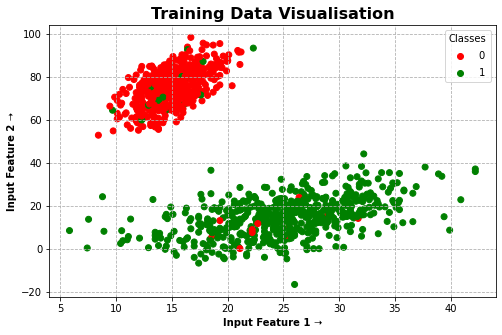

In [67]:
import matplotlib.colors as clrs
import matplotlib.pyplot as plt

label = train_dat3a[:,2]
colors = ['red','green']  # Storing the colours for scatter plot
plt.figure(figsize = (8,5))
sctplot = plt.scatter(train_dat3a[:,0], train_dat3a[:,1], c = label, cmap = clrs.ListedColormap(colors))
plt.legend(*sctplot.legend_elements(num = 1), loc="upper right", title="Classes")
plt.xlabel('Input Feature 1 \u279d', fontweight = 'bold')
plt.ylabel('Input Feature 2 \u279d', fontweight = 'bold')
plt.title('Training Data Visualisation', fontweight = 'bold', fontsize = 16)
plt.grid(linestyle = '--')
plt.show()

Build the logistic regression model using the training data. 

The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries. If you are writing your own implementation, try to keep number of features and number of classes as variables for next parts.

In [0]:
# Function that adds a bias constant to the state, so that theta can be learnt along with a bias term  
def include_bias(x_set):
    biased = np.concatenate((np.ones((len(x_set), 1)), x_set), axis = 1)
    return biased

# LOGISTIC REGRESSION MODEL
def logistic_regression(X_train, Y_train, alpha):
    weight = 0
    Y_train = (Y_train - (Y_train==0))[:, np.newaxis]  # Turning the (0, 1) labels into (-1, 1) labels, to implement our Loss Function
    X_train = include_bias(X_train)
    w = np.random.uniform(size=(X_train.shape[1], 1))  # Randomly initialised weights
    for ite in range(1000):
        # empirical_risk = np.sum(np.log(1+np.exp(-1*np.multiply(Y_train, np.matmul(X_train, w)))))
        grad = np.sum(-1/(1+np.exp(np.multiply(Y_train, np.matmul(X_train, w))))*Y_train*X_train, axis = 0)   # Gradient of the Loss/Empirical Risk Function
        w_old = w
        w = w - alpha*grad[:,np.newaxis]  # Gradient Descent step
        alpha = 0.99*alpha
        if (np.linalg.norm(w-w_old) < 0.0001):
            break  # Break if near convergence
    weight = w
    
    return weight

Print the final weights.

In [114]:
weights3a = np.squeeze(logistic_regression(train_dat3a[:,:2], train_dat3a[:,2], alpha = 0.01))
print("The weights are: "+ str(weights3a))

The weights are: [ 0.82895307  0.18840472 -0.09297936]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


Print the final accuracy on test data.

In [115]:
def find_accuracy(X_test, Y_test, w):
    X_test = include_bias(X_test)
    Y_test_pred = np.squeeze(np.sign((np.matmul(X_test, w[:,np.newaxis]))))
    Y_test_pred = Y_test_pred + (Y_test_pred==-1)
    accuracy = np.sum(Y_test_pred == Y_test)/len(Y_test)
    return accuracy

accuracy3a = find_accuracy(test_dat3a[:,:-1], test_dat3a[:,-1], weights3a)
print("The accuracy of the Logistic Classifier on test data = " + str(accuracy3a*100) + "%")

The accuracy of the Logistic Classifier on test data = 95.46666666666667%


Plot the scatter plot on test data. On top of this scatter plot, plot the decision boundaries.

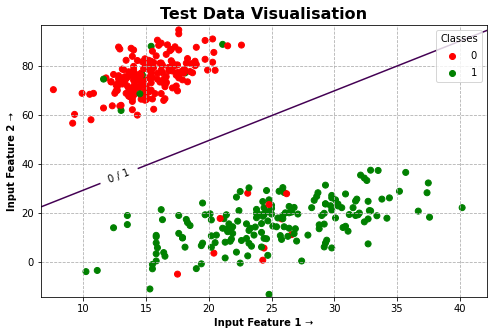

In [116]:
import matplotlib.colors as clrs

x3a = np.linspace(np.amin(test_dat3a[:,0])-1, np.amax(test_dat3a[:,0])+2, 100)
y3a = np.linspace(np.amin(test_dat3a[:,1])-1, np.amax(test_dat3a[:,1])+2, 100)
X3a, Y3a = np.meshgrid(x3a,y3a)  # Generating a meshgrid for the area containing the data points

label = test_dat3a[:,2]
colors = ['red','green']   # Storing the colours for scatter plot
plt.figure(figsize = (8,5))
sctplot = plt.scatter(test_dat3a[:,0], test_dat3a[:,1], c = label, cmap = clrs.ListedColormap(colors))
plt.legend(*sctplot.legend_elements(num = 1), loc="upper right", title="Classes")
plt.xlabel('Input Feature 1 \u279d', fontweight = 'bold')
plt.ylabel('Input Feature 2 \u279d', fontweight = 'bold')
plt.title('Test Data Visualisation', fontweight = 'bold', fontsize = 16)
F3a = weights3a[0] + weights3a[1]*X3a + weights3a[2]*Y3a  # The decision function evaluated all over the grid

cs = plt.contour(X3a,Y3a,F3a,[0])  # The decision boundary will be the contour of the decision function = 0
plt.clabel(cs, inline = True, fmt = '0 / 1', fontsize = 10, colors = 'black')  # Labelling the decision boundary
plt.grid(linestyle='--')

plt.show()

## Problem 3, Part B: Dataset B



Use Dataset B (``data_prob3_partb.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [0]:
import numpy as np
import csv
import random
with open('./data_prob3_partb.csv') as f:
    reader = list(csv.reader(f))
data = reader[1:]
random.shuffle(data)
train_dat3b = np.array(data[:int(0.75*len(data))], dtype = float)
test_dat3b = np.array(data[int(0.75*len(data)):int(len(data))], dtype = float)  # Random splitting into 75% train and 25% test data

Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

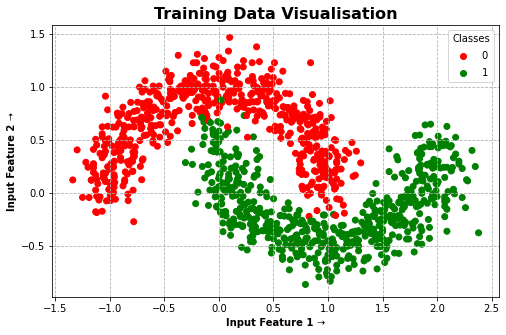

In [73]:
import matplotlib.colors as clrs

label = train_dat3b[:,2]
colors = ['red','green']  # Storing the colours for scatter plot
plt.figure(figsize = (8,5))
sctplot = plt.scatter(train_dat3b[:,0], train_dat3b[:,1], c = label, cmap = clrs.ListedColormap(colors))
plt.legend(*sctplot.legend_elements(num = 1), loc="upper right", title="Classes")
plt.xlabel('Input Feature 1 \u279d', fontweight = 'bold')
plt.ylabel('Input Feature 2 \u279d', fontweight = 'bold')
plt.title('Training Data Visualisation', fontweight = 'bold', fontsize = 16)
plt.grid(linestyle = '--')
plt.show()

Build the logistic regression model using the training data. The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries.

In [74]:
weights3b = np.squeeze(logistic_regression(train_dat3b[:,:2], train_dat3b[:,2], alpha = 0.003))
print("The weights are: "+ str(weights3b))

The weights are: [ 0.56834844  1.2138292  -5.03198069]


Print the final weights.

Print the final accuracy on test data.

In [75]:
accuracy3b = find_accuracy(test_dat3b[:,:-1], test_dat3b[:,-1], weights3b)
print("The accuracy of the Logistic Classifier on test data = " + str(accuracy3b*100) + "%")

The accuracy of the Logistic Classifier on test data = 87.73333333333333%


Plot the scatter plot on test data. On top of this scatter plot, plot the decision boundaries.

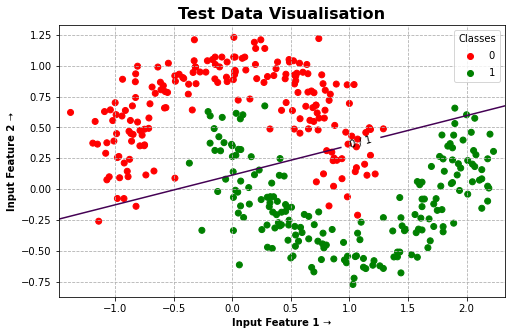

In [76]:
import matplotlib.colors as clrs

x3b = np.linspace(np.amin(test_dat3b[:,0])-0.1, np.amax(test_dat3b[:,0])+0.1, 100)
y3b = np.linspace(np.amin(test_dat3b[:,1])-0.1, np.amax(test_dat3b[:,1])+0.1, 100)
X3b, Y3b = np.meshgrid(x3b,y3b)  # Generating a meshgrid for the area containing the data points

label = test_dat3b[:,2]
colors = ['red','green']  # Storing the colours for scatter plot
plt.figure(figsize = (8,5))
sctplot = plt.scatter(test_dat3b[:,0], test_dat3b[:,1], c = label, cmap = clrs.ListedColormap(colors))
plt.legend(*sctplot.legend_elements(num = 1), loc="upper right", title="Classes")
plt.xlabel('Input Feature 1 \u279d', fontweight = 'bold')
plt.ylabel('Input Feature 2 \u279d', fontweight = 'bold')
plt.title('Test Data Visualisation', fontweight = 'bold', fontsize = 16)
F3b = weights3b[0] + weights3b[1]*X3b + weights3b[2]*Y3b  # The decision function evaluated all over the grid

cs = plt.contour(X3b,Y3b,F3b,[0])  # The decision boundary will be the contour of the decision function = 0
plt.clabel(cs, inline = True, fmt = '0 / 1', fontsize = 10, colors = 'black')  # Labelling the decision boundary
plt.grid(linestyle='--')

plt.show()

As you can see, a straight line is not the best decision boundary for this type of data. In the next part, we will try polynomial feature mapping to generate more features and build the classifier on top of it.

## Problem 3, Part C: Polynomial Feature Mapping



Use Dataset B (``data_prob3_partb.csv``) for this part of the question.


In [0]:
import csv
import random
import numpy as np
with open('./data_prob3_partb.csv') as f:
    reader = list(csv.reader(f))
data = reader[1:]
random.shuffle(data)
train_data3c = np.array(data[:int(0.75*len(data))], dtype = float)
test_data3c = np.array(data[int(0.75*len(data)):int(len(data))], dtype = float)  # Random splitting into 75% train and 25% test data

Generate more features for each datapoint using the following transformation.

For a datapoint $(x_1, x_2)$,
$$ (x_1, x_2) \rightarrow (x_1, x_2, x_1^2, x_2^2, x_1^3, x_2^3, ..., x_1^T, x_2^T) $$
Now, instead of giving $(x_1, x_2)$ as the input to the classifier, use the transformed data as the input to the classifier.

Generate the transformed training and testing dataset using Dataset B (``data_prob3_partb.csv``).

In [0]:
# Function to create the higher powers of the features and include them as more features
def create_features(data, T):
    features = data[:,:2]
    for i in range(2, T+1):
        features = np.concatenate((features, np.power(data[:,:-1], i)), axis = 1)
    out_data = np.concatenate((features, np.expand_dims(data[:,-1], axis = 1)), axis = 1)
    return out_data

Build the logistic regression model using the transformed training data. The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries.

Try different values of $T$ (highest number of degree) between 3 to 10. Find out which value of $T$ gives the best test accuracy. Please print that values of $T$ in the below cell.

In [79]:
accuracies3c = []
for t in range(3,11):  # Checking accuracies for T from 3 to 10, and choosing the best value of T
    train_dat3c = create_features(train_data3c, T = t)
    test_dat3c = create_features(test_data3c, T = t)
    weights3c = np.squeeze(logistic_regression(train_dat3c[:,:-1], train_dat3c[:,-1], alpha = 0.003))
    accuracy3c = find_accuracy(test_dat3c[:,:-1], test_dat3c[:,-1], weights3c)
    print("Test accuracy for T = " + str(t) + " :  " + str(accuracy3c*100)+"%")
    accuracies3c.append(accuracy3c)
final_T = np.argmax(np.array(accuracies3c)) + 3  # In the event of two or more models doing equally well, np.argmax picks the simplest one: Occam's Razor
print('\n  Best value of T = ' + str(final_T))

Test accuracy for T = 3 :  99.46666666666667%
Test accuracy for T = 4 :  98.66666666666667%
Test accuracy for T = 5 :  98.93333333333332%
Test accuracy for T = 6 :  98.93333333333332%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


Test accuracy for T = 7 :  98.66666666666667%
Test accuracy for T = 8 :  97.86666666666667%
Test accuracy for T = 9 :  95.73333333333333%
Test accuracy for T = 10 :  95.73333333333333%

  Best value of T = 3


Print the final weights.

In [80]:
train_dat3c = create_features(train_data3c, T = final_T)
test_dat3c = create_features(test_data3c, T = final_T)

weights3c = np.squeeze(logistic_regression(train_dat3c[:,:-1], train_dat3c[:,-1], alpha = 0.003))
print("The weights are: "+ str(weights3c))

The weights are: [  6.07797188  -3.46675457  -8.83176575 -13.76795837   1.83064723
   9.6801973   -4.04386553]


Print the final accuracy on transformed test data.

In [81]:
accuracy3c = find_accuracy(test_dat3c[:,:-1], test_dat3c[:,-1], weights3c)
print("Final test accuracy for T = " + str(final_T) + " :  " + str(accuracy3c*100) + "%")

Final test accuracy for T = 3 :  99.46666666666667%


Plot the scatter plot on test data (note that this is  the original data , not the transformed one). On top of this scatter plot, plot the new decision boundaries.

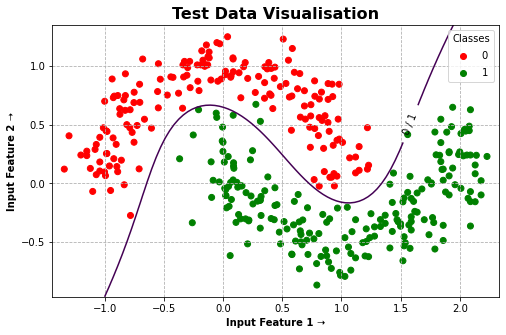

In [82]:
import matplotlib.colors as clrs
import matplotlib.pyplot as plt

x3c = np.linspace(np.amin(test_dat3c[:,0])-0.1, np.amax(test_dat3c[:,0])+0.1, 100)
y3c = np.linspace(np.amin(test_dat3c[:,1])-0.1, np.amax(test_dat3c[:,1])+0.1, 100)
X3c, Y3c = np.meshgrid(x3c,y3c)  # Generating a meshgrid for the area containing the data points

label = test_dat3c[:,-1]
colors = ['red','green']  # Storing the colours for scatter plot
plt.figure(figsize = (8,5))
sctplot = plt.scatter(test_dat3c[:,0], test_dat3c[:,1], c = label, cmap = clrs.ListedColormap(colors))
plt.legend(*sctplot.legend_elements(num = 1), loc="upper right", title="Classes")
plt.xlabel('Input Feature 1 \u279d', fontweight = 'bold')
plt.ylabel('Input Feature 2 \u279d', fontweight = 'bold')
plt.title('Test Data Visualisation', fontweight = 'bold', fontsize = 16)

F3c = weights3c[0]
for count, i in enumerate(range(0, 2*final_T, 2)):
    F3c += weights3c[i+1]*np.power(X3c,(count+1)) + weights3c[i+2]*np.power(Y3c,(count+1))   # The decision function evaluated all over the grid

cs = plt.contour(X3c,Y3c,F3c,[0])   # The decision boundary will be the contour of the decision function = 0
plt.clabel(cs, inline = True, fmt = '0 / 1', fontsize = 10, colors = 'black')  # Labelling the decision boundary
plt.grid(linestyle='--')
plt.show()

## Problem 3, Part D: Multi-class Logistic Regression

## Multi-class Logistic Regression

In case of a multi-class classification problem (when the number of classes is greater than two), a **softmax function** is used instead. 
$$\text{Softmax}(\theta_{i}) = \frac{\exp(\theta_i)}{\sum_{j=1}^{N} \exp(\theta_j)}$$ where $j$ varies from $1$ to $N$ which is the number of classes and  $\theta_{i}$ is $$\theta_{i}=W_{i}*x^{(i)}+b$$ Where $x^{(i)}$ is a feature  vector of dimensions $D \times 1$ and $W_{i}$ is the $i$-th row of the weight matrix $ W$ of  dimensions $N \times D$  and $b$ is the bias having dimensions $D \times 1$.


Use Dataset D (``data_prob3_partd.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [0]:
import numpy as np 
import csv
import random
with open('./data_prob3_partd.csv') as f:
    reader = list(csv.reader(f))
data = reader[1:]
random.shuffle(data)
train_dat3d = np.array(data[:int(0.75*len(data))], dtype = float)
test_dat3d = np.array(data[int(0.75*len(data)):int(len(data))], dtype = float)  # Random splitting into 75% train and 25% test data

Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

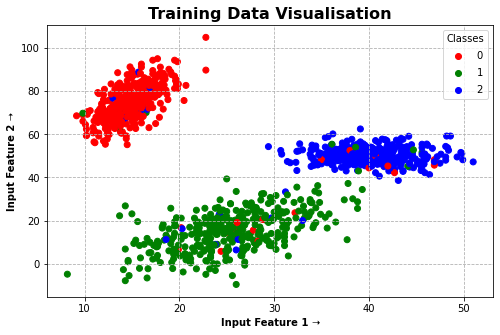

In [84]:
import matplotlib.colors as clrs
import matplotlib.pyplot as plt

label = train_dat3d[:,2]
colors = ['red','green', 'blue']  # Storing the colours for scatter plot
plt.figure(figsize = (8,5))
sctplot = plt.scatter(train_dat3d[:,0], train_dat3d[:,1], c = label, cmap = clrs.ListedColormap(colors))
plt.legend(*sctplot.legend_elements(num = 2), loc="upper right", title="Classes")
plt.xlabel('Input Feature 1 \u279d', fontweight = 'bold')
plt.ylabel('Input Feature 2 \u279d', fontweight = 'bold')
plt.title('Training Data Visualisation', fontweight = 'bold', fontsize = 16)
plt.grid(linestyle = '--')
plt.show()

Build the logistic regression model using the training data. The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries.

In [85]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0, multi_class = 'multinomial')
model.fit(train_dat3d[:,:2], train_dat3d[:,2])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Print the final weights.

In [86]:
intercept = model.intercept_.tolist()
coeffs1 = [intercept[0]] + [model.coef_.tolist()[0]]
coeffs2 = [intercept[1]] + [model.coef_.tolist()[1]]
coeffs3 = [intercept[2]] + [model.coef_.tolist()[2]]
print('Weight vector for Class 1 :\n' + str(coeffs1) + "\n")
print('Weight vector for Class 2 :\n' + str(coeffs2) + "\n")
print('Weight vector for Class 3 :\n' + str(coeffs3) + "\n")

Weight vector for Class 1 :
[1.4335629569705357, [-0.12537548445444247, 0.041880689440769774]]

Weight vector for Class 2 :
[5.225678848807769, [-0.0457546339773641, -0.08524500382375237]]

Weight vector for Class 3 :
[-6.659241805779282, [0.17113011843187154, 0.043364314383310065]]



Print the final accuracy on test data.

In [87]:
print("Final test accuracy :  " + str(model.score(test_dat3d[:,:-1], test_dat3d[:,-1])*100) + "%")

Final test accuracy :  94.13333333333334%


Plot the scatter plot on test data. On top of this scatter plot, plot the decision boundaries.

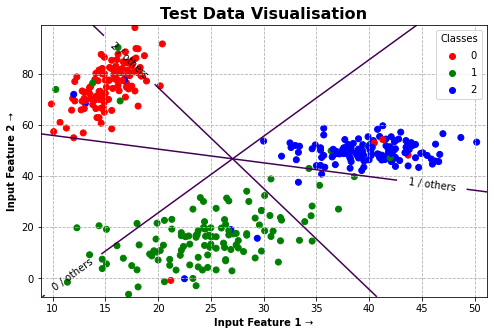

In [88]:
import matplotlib.colors as clrs

label = test_dat3d[:,2]
colors = ['red','green', 'blue']  # Storing the colours for scatter plot
plt.figure(figsize = (8,5))
sctplot = plt.scatter(test_dat3d[:,0], test_dat3d[:,1], c = label, cmap = clrs.ListedColormap(colors))
plt.legend(*sctplot.legend_elements(num = 2), loc="upper right", title="Classes")
plt.xlabel('Input Feature 1 \u279d', fontweight = 'bold')
plt.ylabel('Input Feature 2 \u279d', fontweight = 'bold')
plt.title('Test Data Visualisation', fontweight = 'bold', fontsize = 16)

x3d = np.linspace(np.amin(test_dat3d[:,0])-1, np.amax(test_dat3d[:,0])+1, 1000)
y3d = np.linspace(np.amin(test_dat3d[:,1])-1, np.amax(test_dat3d[:,1])+1, 1000)
X3d, Y3d = np.meshgrid(x3d,y3d)  # Generating a meshgrid for the area containing the data points

F1 = coeffs1[0] + coeffs1[1][0]*X3d + coeffs1[1][1]*Y3d
F2 = coeffs2[0] + coeffs2[1][0]*X3d + coeffs2[1][1]*Y3d
F3 = coeffs3[0] + coeffs3[1][0]*X3d + coeffs3[1][1]*Y3d  # The decision function evaluated all over the grid

cs1 = plt.contour(X3d,Y3d,F1,[0])
cs2 = plt.contour(X3d,Y3d,F2,[0])
cs3 = plt.contour(X3d,Y3d,F3,[0])  # The decision boundaries will be the contours of the individual decision functions = 0  
plt.clabel(cs1, inline = True, fmt = '0 / others', fontsize = 10, colors = 'black')
plt.clabel(cs2, inline = True, fmt = '1 / others', fontsize = 10, colors = 'black')
plt.clabel(cs3, inline = True, fmt = '2 / others', fontsize = 10, colors = 'black')  # Labelling the decision boundaries
plt.grid(linestyle='--')

plt.show()

# Problem 4: Learning on real world datasets

*Cric_data.csv* contains the batting averages and bowling averages of various cricket players along with their role in the team (Bowler/Batsman/Allrounder). The task is to predict the player role based on their batting and bowling averages.

In the next CodeWrite cell, extract the required columns from the csv file, partition the data into training (75%) and testing (25%) data randomly.  

In [0]:
# Extract data and partition

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

inp = pd.read_csv('Cric_data.csv', usecols=['Batting Average', 'Bowling Average', 'Player Class']).values

# Splitting into 75% train and 25% test data
X_train, X_test, Y_train, Y_test = train_test_split(inp[:,:-1], inp[:,-1], test_size = 0.25)

**Binary Classification:**

Derive the classifiers under the assumptions below, and use ML estimators to compute and return the results on the test set. *Consider only batsmen and bowlers in this part*.

Let random variable $\underline X$ represent (Batting Average, Bowling Average) of a player whose role is a random variable $Y$.

1a) Linear Predictor: Assume $\underline X|Y=Batsman \sim \mathcal{N}(\underline {\mu_-}, I)$ and  $X|Y=Bowler \sim \mathcal{N}(\underline {\mu_+}, I)$. 

1b) Bayes Classifier: Assume $\underline X|Y=Batsman \sim \mathcal{N}(\underline {\mu_-}, \Sigma_-)$ and  $X|Y=Bowler \sim \mathcal{N}(\underline {\mu_+}, \Sigma_+)$. 

In [0]:
X_train_bb = X_train[Y_train!=0, :]
X_test_bb = X_test[Y_test!=0, :]
Y_train_bb = Y_train[Y_train!=0]
Y_test_bb = Y_test[Y_test!=0]   # Storing just the batsmen and bowlers data in another array for Binary Classification

def bivar_gaussian_prob(x_array, mean, cov):
    return np.diag(1/(2*np.pi*np.sqrt(np.linalg.det(cov)))*np.exp(-0.5*np.matmul(np.matmul(x_array-mean, np.linalg.inv(cov)), (x_array-mean).T)))

def Lin_clsf_1a(X_train, Y_train, X_test):
    
    mean_bat = np.mean(X_train[Y_train == -1, :], axis = 0)
    mean_bow = np.mean(X_train[Y_train == 1, :], axis = 0)
    cov_bat = np.identity(2)
    cov_bow = np.identity(2)
    Y_test_pred = ((bivar_gaussian_prob(X_test, mean_bat, cov_bat) < bivar_gaussian_prob(X_test, mean_bow, cov_bow)) - 0.5)*2  # ML Estimator based prediction

    return Y_test_pred

Y_test_pred4_1a = Lin_clsf_1a(X_train_bb, Y_train_bb, X_test_bb)
accuracy4_1a = np.sum(Y_test_bb == Y_test_pred4_1a)/len(Y_test_bb)
print("\nThe accuracy of the linear classifier = " + str(100*accuracy4_1a) + "%")
print("The error rate of the linear classifier = " + str(1-accuracy4_1a))

def Bayes_clsf_1b(X_train, Y_train, X_test):

    mean_bat = np.mean(X_train[Y_train == -1, :], axis = 0)
    mean_bow = np.mean(X_train[Y_train == 1, :], axis = 0)
    p_bat = len(Y_train[Y_train == -1])/len(Y_train)
    p_bow = len(Y_train[Y_train == 1])/len(Y_train)  # Prior probabilities
    cov_bat = np.cov(X_train[Y_train == -1, :].T)
    cov_bow = np.cov(X_train[Y_train == 1, :].T)
    Y_test_pred = ((p_bat*bivar_gaussian_prob(X_test, mean_bat, cov_bat) < p_bow*bivar_gaussian_prob(X_test, mean_bow, cov_bow)) - 0.5)*2  # MAP Rule based prediction: Bayesian prediction

    return Y_test_pred

Y_test_pred4_1b = Bayes_clsf_1b(X_train_bb, Y_train_bb, X_test_bb)
accuracy4_1b = np.sum(Y_test_bb == Y_test_pred4_1b)/len(Y_test_bb)
print("\nThe accuracy of the Bayes classifier = " + str(100*accuracy4_1b) + "%")
print("The error rate of the linear classifier = " + str(1-accuracy4_1b))
    


The accuracy of the linear classifier = 83.41708542713567%
The error rate of the linear classifier = 0.16582914572864327

The accuracy of the Bayes classifier = 89.44723618090453%
The error rate of the linear classifier = 0.10552763819095479


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


**Multi-class Classification:**

Derive the classifiers under the assumptions below, and use ML estimators to compute and return the results on the test set. *Consider batsmen, bowlers and allrounders in this part*.

Let random variable $\underline X$ represent (Batting Average, Bowling Average) of a player whose role is a random variable $Y$.

The $3\times 3$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below. (Ordering: Batsman - Allrounder - Bowler)

$L=\begin{bmatrix} 0 &1 & 2\\ 1 &0 & 1\\ 2 &1 & 0\end{bmatrix}$ 

2a) Linear Predictor: Assume $\underline X|Y=a \sim \mathcal{N}(\underline {\mu_a}, I)$

2b) Bayes Classifier: Assume $\underline X|Y=a \sim \mathcal{N}(\underline {\mu_a}, \Sigma_a)$

In [0]:
def bivar_gaussian_prob(x_array, mean, cov):
    return np.diag(1/(2*np.pi*np.sqrt(np.linalg.det(cov)))*np.exp(-0.5*np.matmul(np.matmul(x_array-mean, np.linalg.inv(cov)), (x_array-mean).T)))

L = np.array([[0,1,2],[1,0,1],[2,1,0]])

def Lin_clsf_2a(X_train, Y_train, X_test):
    
    mean_bat = np.mean(X_train[Y_train == -1, :], axis = 0)
    mean_all = np.mean(X_train[Y_train == 0, :], axis = 0)
    mean_bow = np.mean(X_train[Y_train == 1, :], axis = 0)
    cov_bat = np.identity(2)
    cov_all = np.identity(2)
    cov_bow = np.identity(2)
    # ML Estimator based prediction
    Y_test_pred = np.argmax(np.vstack((bivar_gaussian_prob(X_test, mean_bat, cov_bat), bivar_gaussian_prob(X_test, mean_all, cov_all), bivar_gaussian_prob(X_test, mean_bow, cov_bow))), axis = 0) - 1
    return Y_test_pred
    
Y_test_pred4_2a = Lin_clsf_2a(X_train, Y_train, X_test)
accuracy4_2a = np.sum(Y_test == Y_test_pred4_2a)/len(Y_test)
error_rate4_2a = np.sum(L[Y_test.astype(int)+1, Y_test_pred4_2a.astype(int)+1])/len(Y_test)
print("\nThe accuracy of the linear classifier = " + str(100*accuracy4_2a) + "%")
print("The error rate of the linear classifier = " + str(error_rate4_2a))

def Bayes_clsf_2b(X_train, Y_train, X_test):
    
    mean_bat = np.mean(X_train[Y_train == -1, :], axis = 0)
    mean_all = np.mean(X_train[Y_train == 0, :], axis = 0)
    mean_bow = np.mean(X_train[Y_train == 1, :], axis = 0)
    p_bat = len(Y_train[Y_train == -1])/len(Y_train)
    p_all = len(Y_train[Y_train == 0])/len(Y_train)
    p_bow = len(Y_train[Y_train == 1])/len(Y_train)
    cov_bat = np.cov(X_train[Y_train == -1, :].T)
    cov_all = np.cov(X_train[Y_train == 0, :].T)
    cov_bow = np.cov(X_train[Y_train == 1, :].T)
    # MAP Rule based prediction: Bayesian prediction
    Y_test_pred = np.argmax(np.vstack((p_bat*bivar_gaussian_prob(X_test, mean_bat, cov_bat), p_all*bivar_gaussian_prob(X_test, mean_all, cov_all), p_bow*bivar_gaussian_prob(X_test, mean_bow, cov_bow))), axis = 0) - 1

    return Y_test_pred

Y_test_pred4_2b = Bayes_clsf_2b(X_train, Y_train, X_test)
accuracy4_2b = np.sum(Y_test == Y_test_pred4_2b)/len(Y_test)
error_rate4_2b = np.sum(L[Y_test.astype(int)+1, Y_test_pred4_2b.astype(int)+1])/len(Y_test)
print("\nThe accuracy of the Bayes classifier = " + str(100*accuracy4_2b) + "%")
print("The error rate of the linear classifier = " + str(error_rate4_2b))
    
    


The accuracy of the linear classifier = 66.35220125786164%
The error rate of the linear classifier = 0.3584905660377358

The accuracy of the Bayes classifier = 64.46540880503144%
The error rate of the linear classifier = 0.3710691823899371


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


**Plots:**

In the next CodeWrite cell, plot all the 4 classifiers on a 2d plot. Take a suitable grid covering averages (0,60) in both dimensions. (Color the different classes accordingly). Add the training data points also on the plot. Label the plots appropriately. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


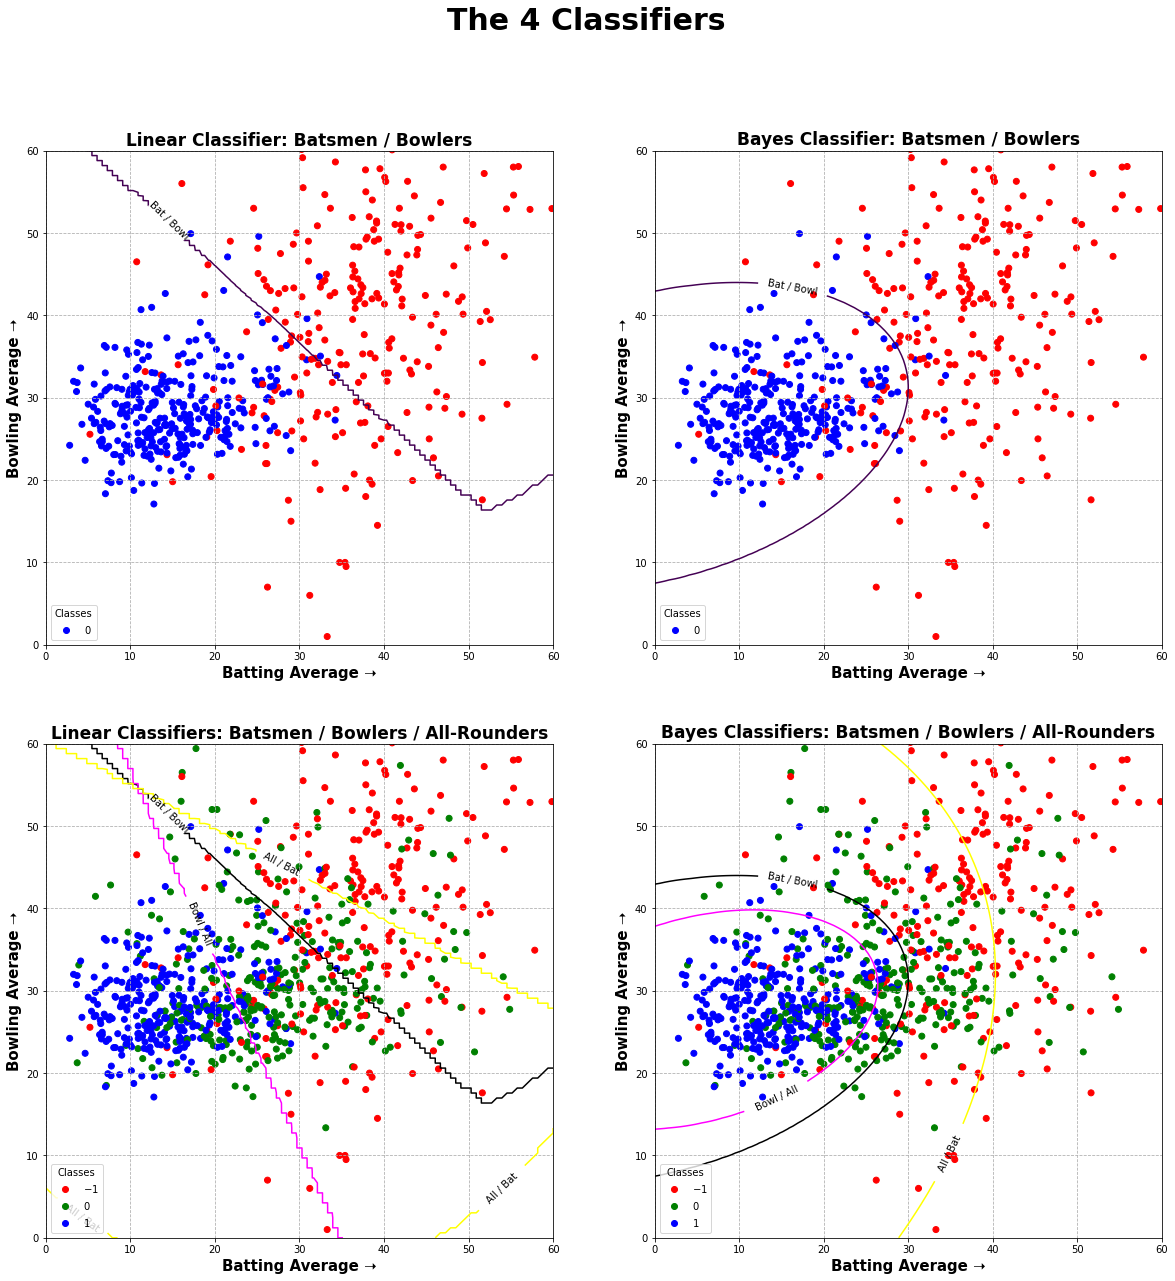

In [0]:
# Write the code for plotting here.
import matplotlib.pyplot as plt
import matplotlib.colors as clrs

plt.figure(figsize = (20,20))

x1 = np.linspace(0, 60, 100)
x2 = np.linspace(0, 60, 100)
X1, X2 = np.meshgrid(x1,x2)
X1_ = X1.flatten()[:,np.newaxis]
X2_ = X2.flatten()[:,np.newaxis]
coords = np.concatenate((X1_,X2_), axis = 1)

mean_bat = np.mean(X_train[Y_train == -1, :], axis = 0)
mean_all = np.mean(X_train[Y_train == 0, :], axis = 0)
mean_bow = np.mean(X_train[Y_train == 1, :], axis = 0)

cov_bat = np.identity(2)
cov_bow = np.identity(2)

F = bivar_gaussian_prob(coords, mean_bat, cov_bat) - bivar_gaussian_prob(coords, mean_bow, cov_bow)  # Evaluating the decision function at all coordinates
F = F.reshape((100,100))

plt.subplot(221)
cs = plt.contour(X1,X2,F,[0])  # The decision boundary will be the contour of decision function = 0
plt.clabel(cs, inline = True, fmt = 'Bat / Bowl', fontsize = 10, colors = 'black')  # Including which boundary it is within the contour line
colors = ['red', 'blue']
sctplot = plt.scatter(X_train_bb[:,0], X_train_bb[:,1], c = Y_train_bb, cmap = clrs.ListedColormap(colors))
plt.legend(*sctplot.legend_elements(num = 1), loc="lower left", title="Classes")
plt.grid(linestyle='--')
plt.title('Linear Classifier: Batsmen / Bowlers', fontweight = 'bold', fontsize = 17)
plt.xlabel('Batting Average \u279d', fontweight = 'bold', fontsize = 15)
plt.ylabel('Bowling Average \u279d', fontweight = 'bold', fontsize = 15)
plt.xlim([0,60])
plt.ylim([0,60])

p_bat = len(Y_train_bb[Y_train_bb == -1])/len(Y_train_bb)
p_bow = len(Y_train_bb[Y_train_bb == 1])/len(Y_train_bb)
cov_bat = np.cov(X_train[Y_train == -1, :].T)
cov_bow = np.cov(X_train[Y_train == 1, :].T)

F = p_bat*bivar_gaussian_prob(coords, mean_bat, cov_bat) - p_bow*bivar_gaussian_prob(coords, mean_bow, cov_bow)  # Evaluating the decision function at all coordinates
F = F.reshape((100,100))

plt.subplot(222)
cs = plt.contour(X1,X2,F,[0])  # The decision boundary will be the contour of decision function = 0
plt.clabel(cs, inline = True, fmt = 'Bat / Bowl', fontsize = 10, colors = 'black')  # Including which boundary it is within the contour line
colors = ['red', 'blue']
sctplot = plt.scatter(X_train_bb[:,0], X_train_bb[:,1], c = Y_train_bb, cmap = clrs.ListedColormap(colors))
plt.legend(*sctplot.legend_elements(num = 1), loc="lower left", title="Classes")
plt.grid(linestyle='--')
plt.title('Bayes Classifier: Batsmen / Bowlers', fontweight = 'bold', fontsize = 17)
plt.xlabel('Batting Average \u279d', fontweight = 'bold', fontsize = 15)
plt.ylabel('Bowling Average \u279d', fontweight = 'bold', fontsize = 15)
plt.xlim([0,60])
plt.ylim([0,60])

p_bat = len(Y_train[Y_train == -1])/len(Y_train)
p_all = len(Y_train[Y_train == 0])/len(Y_train)
p_bow = len(Y_train[Y_train == 1])/len(Y_train)
cov_bat = np.identity(2)
cov_all = np.identity(2)
cov_bow = np.identity(2)

F1 = bivar_gaussian_prob(coords, mean_bat, cov_bat) - bivar_gaussian_prob(coords, mean_bow, cov_bow)
F1 = F1.reshape((100,100))
F2 = bivar_gaussian_prob(coords, mean_bow, cov_bow) - bivar_gaussian_prob(coords, mean_all, cov_all)
F2 = F2.reshape((100,100))
F3 = bivar_gaussian_prob(coords, mean_all, cov_all) - bivar_gaussian_prob(coords, mean_bat, cov_bat)   # Evaluating the decision functions at all coordinates
F3 = F3.reshape((100,100))

plt.subplot(223)
cs1 = plt.contour(X1,X2,F1,[0], colors = 'black')
cs2 = plt.contour(X1,X2,F2,[0], colors = 'magenta')
cs3 = plt.contour(X1,X2,F3,[0], colors = 'yellow')  # The decision boundaries will be the contours of the individual decision functions = 0
plt.clabel(cs1, inline = True, fmt = 'Bat / Bowl', fontsize = 10, colors = 'black')
plt.clabel(cs2, inline = True, fmt = 'Bowl / All', fontsize = 10, colors = 'black')
plt.clabel(cs3, inline = True, fmt = 'All / Bat', fontsize = 10, colors = 'black')  # Including the names of the boundaries within the contour line
colors = ['red', 'green', 'blue']
sctplot = plt.scatter(X_train[:,0], X_train[:,1], c = Y_train, cmap = clrs.ListedColormap(colors))
plt.legend(*sctplot.legend_elements(num = 2), loc="lower left", title="Classes")
plt.grid(linestyle='--')
plt.title('Linear Classifiers: Batsmen / Bowlers / All-Rounders', fontweight = 'bold', fontsize = 17)
plt.xlabel('Batting Average \u279d', fontweight = 'bold', fontsize = 15)
plt.ylabel('Bowling Average \u279d', fontweight = 'bold', fontsize = 15)
plt.xlim([0,60])
plt.ylim([0,60])

cov_bat = np.cov(X_train[Y_train == -1, :].T)
cov_all = np.cov(X_train[Y_train == 0, :].T)
cov_bow = np.cov(X_train[Y_train == 1, :].T)


F1 = p_bat*bivar_gaussian_prob(coords, mean_bat, cov_bat) - p_bow*bivar_gaussian_prob(coords, mean_bow, cov_bow)
F1 = F1.reshape((100,100))
F2 = p_bow*bivar_gaussian_prob(coords, mean_bow, cov_bow) - p_all*bivar_gaussian_prob(coords, mean_all, cov_all)
F2 = F2.reshape((100,100))
F3 = p_all*bivar_gaussian_prob(coords, mean_all, cov_all) - p_bat*bivar_gaussian_prob(coords, mean_bat, cov_bat)  # Evaluating the decision functions at all coordinates
F3 = F3.reshape((100,100))

plt.subplot(224)
cs1 = plt.contour(X1,X2,F1,[0], colors = 'black')
cs2 = plt.contour(X1,X2,F2,[0], colors = 'magenta')
cs3 = plt.contour(X1,X2,F3,[0], colors = 'yellow')    # The decision boundaries will be the contours of the individual decision functions = 0
plt.clabel(cs1, inline = True, fmt = 'Bat / Bowl', fontsize = 10, colors = 'black')
plt.clabel(cs2, inline = True, fmt = 'Bowl / All', fontsize = 10, colors = 'black')
plt.clabel(cs3, inline = True, fmt = 'All / Bat', fontsize = 10, colors = 'black')    # Including the names of the boundaries within the contour line
colors = ['red', 'green', 'blue']
sctplot = plt.scatter(X_train[:,0], X_train[:,1], c = Y_train, cmap = clrs.ListedColormap(colors))
plt.legend(*sctplot.legend_elements(num = 2), loc="lower left", title="Classes")
plt.grid(linestyle='--')
plt.title('Bayes Classifiers: Batsmen / Bowlers / All-Rounders', fontweight = 'bold', fontsize = 17)
plt.xlabel('Batting Average \u279d', fontweight = 'bold', fontsize = 15)
plt.ylabel('Bowling Average \u279d', fontweight = 'bold', fontsize = 15)
plt.xlim([0,60])
plt.ylim([0,60])

plt.suptitle(r'The 4 Classifiers', fontweight = 'bold', fontsize = 30)
plt.show()

**Observations:**

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the four learnt classifiers, and also give the error rate of the four classifiers as a 2x2 table.


<font color='blue'>**Observations**


- The linear classifier plots have linear decision boundaries as expected. This is because the covariance matrix used in the bivariate Gaussian distributions is $I$.
- The Bayes classifiers have curved decision boundaries. This is because the covariance matrices are non-identity.
- Since the first 2 classfiers only classify batsmen vs. bowlers which form two somewhat distinct clusters in the 2-dimensional space, they have more accuracy and lesser error.
- Since the next 2 include the all-rounders who are present in between the batsmen and bowlers clusters, and somewhat blend with them, it becomes harder for classifiers to accuractely classify, leading to lower accuracy and higher error.
- The error rate for the latter two classifiers is not equal to (1-accuracy), because the error has been defined as being equal to 2 for bowlers classified as batsmen or vice versa, therefore each error is not worth just 1. Occasionally, we have an error which is twice as bad. 
- The Bayes classifier does better in the binary classification but does worse when the all-rounders are also included in the dataset.
</font>



<font color='blue'>**Error Rate Table**

.|Linear Classifier| Bayes Classifier
---|:---:|:--:
**Batsmen + Bowlers**|16.58%|10.55%|
**Batsmen + Bowlers + All-Rounders** |35.85%|37.11%|

</font>

